In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as optimize
import sympy as sp
from matplotlib import cm

Text(0.5, 0, 'y')

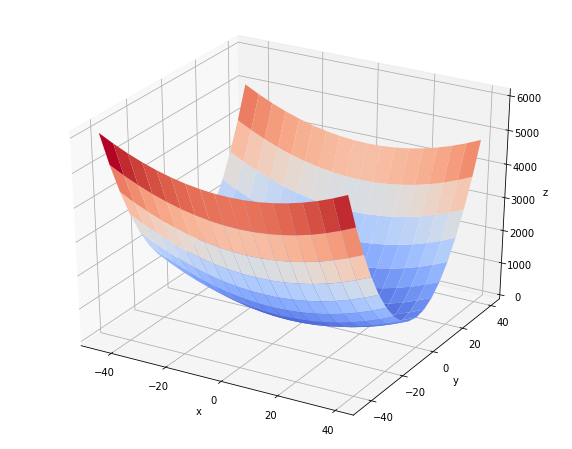

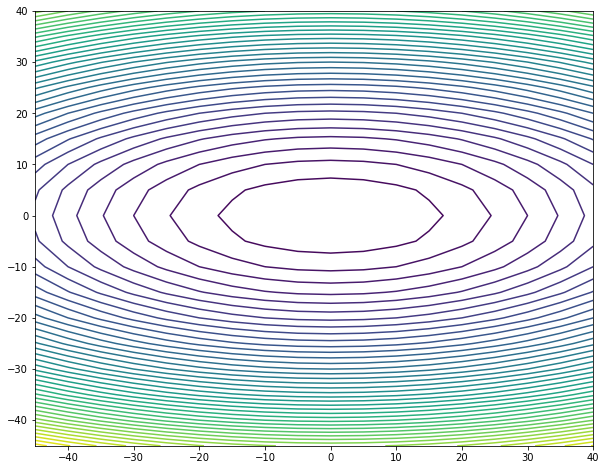

In [5]:
x = sp.Symbol('x')
y = sp.Symbol('y')

def f(d):
#     l = 0.5*x**2 + 2.5*y**2
    xx = d[0] ; yy = d[1]
    l_evaluated = 0.5*xx**2 + 2.5*yy**2
    return l_evaluated
    
def df(func , d ,h=0.01):
    xx = d[0] ; yy = d[1]
    dx = (func([(xx + h),yy]) - func([(xx - h),yy]))/(2*h)
    dy = (func([xx, (yy + h)]) - func([xx, (yy - h)]))/(2*h)
    return [dx,dy]

fig = plt.figure(figsize= (10,8))
ax = fig.gca(projection='3d')


x_mesh, y_mesh = np.meshgrid(np.arange(-45,45,5), np.arange(-45,45,5))
f_mesh = f(np.array([x_mesh, y_mesh]))

ax.plot_surface(x_mesh, y_mesh, f_mesh, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

fig = plt.figure(figsize= (10,8))
plt.contour(x_mesh,y_mesh,f_mesh,50)
ax.set_xlabel('x')
ax.set_ylabel('y')

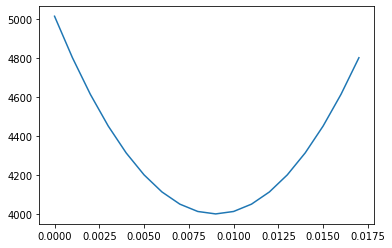

In [39]:
plt.plot(x_mesh[1][:18],f_mesh[1])

[[-42, 30]]
[[-42, 30], [-37.800000000001546, 15.0]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5], [-30.61800000000187, 3.7500000000005684]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5], [-30.61800000000187, 3.7500000000005684], [-27.556200000001468, 1.8750000000002842]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5], [-30.61800000000187, 3.7500000000005684], [-27.556200000001468, 1.8750000000002842], [-24.80058000000082, 0.9375000000002842]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5], [-30.61800000000187, 3.7500000000005684], [-27.556200000001468, 1.8750000000002842], [-24.80058000000082, 0.9375000000002842], [-22.32052200000038, 0.46875]]
[[-42, 30], [-37.800000000001546, 15.0], [-34.02000000000112, 7.5], [-30.61800000000187, 3.7500000000005684], [-27.556200000001468, 1.8750000000002842], [-24.80058000000082, 0.9375000000002842], 

TypeError: Shape of x does not match that of z: found (10000, 10000) instead of (18, 18).

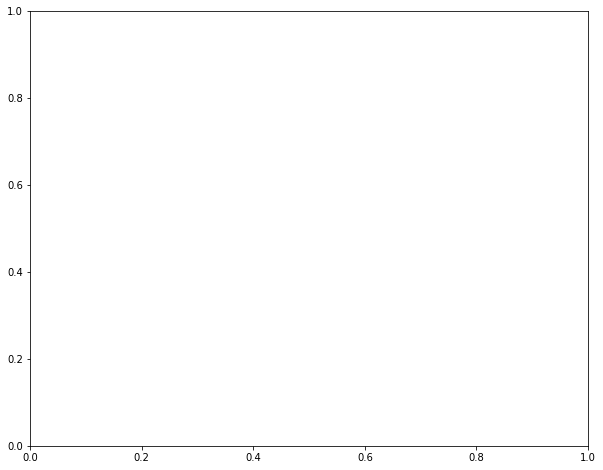

In [60]:
# guesses = [[-10, -40]]
guesses = [[-42,30]]
precision = 1/1000000
max_interations = 100
alpha = 0.1
count = 0

x0 = guesses[0][0]  # guess x
y0 = guesses[0][1] # guess y
while True:
    print(guesses)
    x_temp = x0 - alpha * df( f , [x0,y0] )[0]
    y_temp = y0 - alpha * df( f , [x0,y0] )[1]
    
    guesses.append([x_temp,y_temp])
    
    count += 1
#     print(count)
    if count > max_interations:
        print ("too many iternations, adjust alpha")
        break
    
    if abs(x_temp - guesses[0][0]) < precision and abs(y_temp - guesses[0][1]) < precision:
        break
    
    
    x0 = x_temp
    y0 = y_temp

fig = plt.figure(figsize= (10,8))
plt.contour(x_mesh, y_mesh, f_mesh, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")
ax.set_xlabel('x')
ax.set_ylabel('y')

print("the minima is at :", guesses[-1])

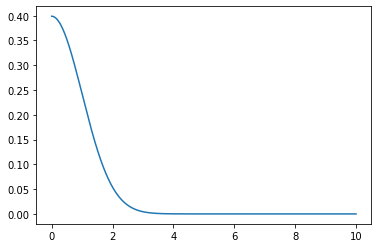

In [16]:
# from scipy.stats import norm


# # define the distribution parameters
# sample_space = np.arange(-5, 5, 0.001)
# time = np.arange(0,10,0.001)
# mean = 0.0
# stdev = 1.0
# # calculate the pdf
# pdf = norm.pdf(time, mean, stdev)
# # plot
# plt.plot(time, pdf)



# x_mesh, y_mesh = np.meshgrid(time, pdf)
# ax.plot_surface(x_mesh,y_mesh,sample_space , cmap=cm.coolwarm)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

# fig = plt.figure(figsize= (10,8))
# plt.contour(x_mesh,y_mesh,f_mesh,50)
# ax.set_xlabel('x')
# ax.set_ylabel('y')

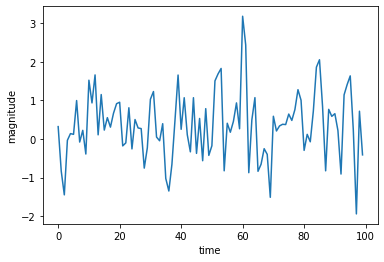

In [46]:
n=100
t=np.arange(n)
y_=np.random.uniform(-1,1,n)
x = np.arange(n)

mu= np.random.uniform(0,1,n)
sigma=np.random.uniform(0,1,n)
e= np.random.normal(mu, sigma, n)
#stationary series
peaks = y_+e

plt.plot(t,peaks)
plt.xlabel("time")
plt.ylabel("magnitude")
plt.show()




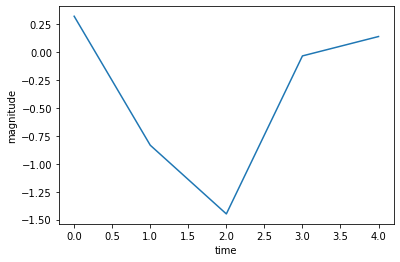

In [55]:
plt.plot(t[:5],peaks[:5])
plt.xlabel("time")
plt.ylabel("magnitude")
plt.show()

In [68]:
def slope(points):
    p1 = points[0]
    p2 = points[1]
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    return m

In [76]:
# guesses = [[-10, -40]]
guesses = [[.1,0],[0, 0.32072469539714776]]
# guesses = [[0, 0.32072469539714776]]
precision = 1/100
max_interations = 1000
alpha = 0.1
count = 0

x0 = guesses[0][0]  # guess x
y0 = guesses[0][1] # guess y
while True:
    print(slope(guesses[-2:]))
    
    x_temp = x0 - alpha * slope(guesses[-2:] )
    y_temp = y0 - alpha * slope(guesses[-2:] )
    
    guesses.append([x_temp,y_temp])
    
    count += 1
#     print(count)
    if count > max_interations:
        print ("too many iternations, adjust alpha")
        break
    
    if abs(x_temp - guesses[0][0]) < precision and abs(y_temp - guesses[0][1]) < precision:
        break
    
    
    x0 = x_temp
    y0 = y_temp

# fig = plt.figure(figsize= (10,8))
# plt.contour(x_mesh, y_mesh, f_mesh, 50)
# it_array = np.array(guesses)
# plt.plot(it_array.T[0], it_array.T[1], "x-")
# ax.set_xlabel('x')
# ax.set_ylabel('y')

print("the minima is at :", guesses[-1])

-0.32072469539714776
-0.27968212928513303
1.0000000000000016
0.9999999999999996
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999989
0.9999999999999997
0.9999999999999987
1.0
1.000000000000001
1.0
1.000000000000001
1.0
1.000000000000001
1.000000000000001
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999956
1.0
0.9999999999999956
1.0
0.9999999999999956
1.0
0.9999999999999956
1.0
0.9999999999999956
1.0000000000000044
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000178
1.0
1.0000000000000178
1.

a few notes:

1. Tried to come up with dummy data
   - need to figure out how to say that x,y is a gaussian distribution and then have that change over time. 
       - two ways that can go: either y is the gaussian distribution wrt x or xy are a meshgrid with z being
         magnitude. I feel like the former makes more sense but in that case, x,y are not angles anymore. it
         would be that x is an angle while y is magnitude
   - not sure how to plot either of those cases. 


2. Got a dummy time series to work with 
    - i just picked out a dummy time series to work it out as a 2d problem with the steepest desend. 
        - was not a good idea. it did nothing but waste my time because it doesnt correctly guess the local
          minimum.(explained below)    
    - the steepest desend method is based on the function that you already have. 
        - this is my real concern about the algorithm bc I need the slope/derivative of the function at 
          the point that we are evaluting to figure out what the next point is. this can go two ways:
            1. I can do something called mini-batch grediant method which is steepest desend but in smaller
               batches of the data. in this cass, i would make a list of "batches". Then, for each batch
               fit that data using scipy and then use the function that gives me for applying steepest desend.
            2. if i dont have a function, then i change my df function to just a normal "find slope using two
               points". I tried this but it really doesent work. Maybe if i can get it to incorperate the "batch"
               data then it may or may not work. IMO, this seems like a short term fix which isnt general enough
               to work on other data set.
               
       
 